# Airline Customer Satisfaction

<b>Introduction</b>

This Jupyter notebook focuses on the nitty-gritty of Airline Passenger Satisfaction. It's not your typical analysis; we're digging into various aspects like passenger age, the purpose of travel, and ratings for airline services. Think of it as a detective work with data—connecting the dots to understand what factors play a role in shaping passenger contentment. By crunching the numbers, we aim to uncover patterns that airlines can use to up their satisfaction game. So, if you're curious about the behind-the-scenes of what makes air travelers happy or dissatisfied, stick around as we unravel the data-driven insights in this exploration.

# <a id = "table_of_content"></a>
## Table of Contents
1. [Importing the Libraries](#1)

2. [Importing the Dataset](#2) 

3. [Dataset Analysis](#3)

    - 3.1 [Observing the data](#3.1)
    - 3.2 [Checking Imbalance in Target Values of Training Data](#3.2)
    - 3.3 [Determining Missing Values](#3.3)
    - 3.4 [Filling Missing Values](#3.4)
    - 3.5 [Checking for Outliers](#3.5)
    - 3.6 [Joining Train/Test](#3.6)
    - 3.7 [Removing Initial Insignificant Features](#3.7)

4. [Visualizing, Comparing and Imputing Missing Values](#4)
    - 4.1 [Comparing the effect of different categorical features on customer satisfaction](#4.1)
        - 4.1.1 [Gender](#4.1.1)
        - 4.1.2 [Customer Type](#4.1.2)
        - 4.1.3 [Type of Travel](#4.1.3)
        - 4.1.4 [Travel Class](#4.1.4)
    - 4.2 [Heatmap of Remaining Features with Satisfaction](#4.2)
    - 4.3 [Exploring Distribution of Ratings by Customers for Various Airline Services](#4.3)
    - 4.4 [Filling Non Applicable Ratings](#4.4)
    - 4.5 [Exploring How Different Ratings Contribute to Customer Satisfaction](#4.5)

5. [Feature Engineering](#5)
    - 5.1 [Checking for Skewness in Continous Features](#5.1)
    - 5.2 [Correcting Skewness in Continous Features](#5.2)
    - 5.2 [Removing Non-Essential Features](#5.3)
    - 5.3 [One-hot Encoding Categorical Values](#5.4)
    - 5.5 [Solving fare skewness](#5.5)
    - 5.6 [Correcting Data Imbalance in Training Dataset](#5.6)
    - 5.7 [Scaling the Data](#5.7)

6. [Building/Training/Evaluating our models](#6)
    - 6.1 [Modelling various classifiers](#6.1)
    - 6.2 [Hyperparameter Tuning of Models](#6.2)
        - 6.2.1 [Random Forest Classifier](#6.2.1)
        - 6.2.2 [Extra Trees Classifier](#6.2.2)
    - 6.3 [Ensemble Modeling](#6.3)
    - 6.4 [Prediction With the Best Model](#6.4)

### <a id = "1"></a>1 - Importing the Libraries
[Go back to the Table of Contents](#table_of_content)

In [1]:
# Airline Customer Satisfaction

#Importing the data analysis libraries
import numpy as np # linear algebra
import pandas as pd # data processing

#Importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Ensuring that we don't see any warnings while running the cells
import warnings
warnings.filterwarnings('ignore') 

#Importing the counter
from collections import Counter

#Importing sci-kit learn libraries that we will need for this project
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## <a id = "2"></a>2 - Importing the Dataset
[Go back to the Table of Contents](#table_of_content)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
#Reading the data from the given files and creating a training and test dataset
train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("../input/airline-passenger-satisfaction/test.csv")

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


## <a id = "3"></a>3 -  Dataset Analysis and Correction
[Go back to the Table of Contents](#table_of_content)

### <a id = "3.1"></a>3.1 - Observing the Data
[Go back to the Table of Contents](#table_of_content)

In [3]:
train.sample(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
13258,13258,39651,Female,Loyal Customer,52,Business travel,Business,3005,1,0,...,4,4,0,4,2,4,4,13,11.0,neutral or dissatisfied
61876,61876,77783,Male,Loyal Customer,44,Personal Travel,Eco,731,3,1,...,2,1,3,2,1,2,2,0,0.0,neutral or dissatisfied
79758,79758,52683,Female,Loyal Customer,27,Personal Travel,Eco,119,2,4,...,1,3,4,1,2,5,1,0,0.0,neutral or dissatisfied
42050,42050,54306,Male,Loyal Customer,34,Business travel,Business,1597,1,1,...,5,5,5,5,4,5,4,4,0.0,satisfied
90001,90001,121327,Female,Loyal Customer,36,Personal Travel,Eco,1009,2,5,...,1,4,3,2,4,2,1,0,0.0,neutral or dissatisfied
40694,40694,80269,Female,Loyal Customer,57,Business travel,Business,746,1,4,...,4,4,4,4,3,4,5,2,0.0,satisfied
60197,60197,85414,Male,Loyal Customer,51,Business travel,Business,3179,5,3,...,5,5,5,5,5,5,4,0,0.0,satisfied
94394,94394,51727,Male,Loyal Customer,39,Personal Travel,Eco,369,2,5,...,1,4,5,2,5,2,1,0,0.0,neutral or dissatisfied
88056,88056,126233,Female,Loyal Customer,41,Business travel,Eco,190,5,3,...,5,4,1,3,3,1,5,0,0.0,satisfied
32560,32560,2264,Male,Loyal Customer,48,Business travel,Business,691,4,4,...,4,4,4,4,3,4,3,78,76.0,satisfied


In [4]:
train.describe(include="all")

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


### <a id = "3.2"></a>3.2 - Checking Imbalance in Target Values of Training Data
[Go back to the Table of Contents](#table_of_content)

<Axes: xlabel='satisfaction'>

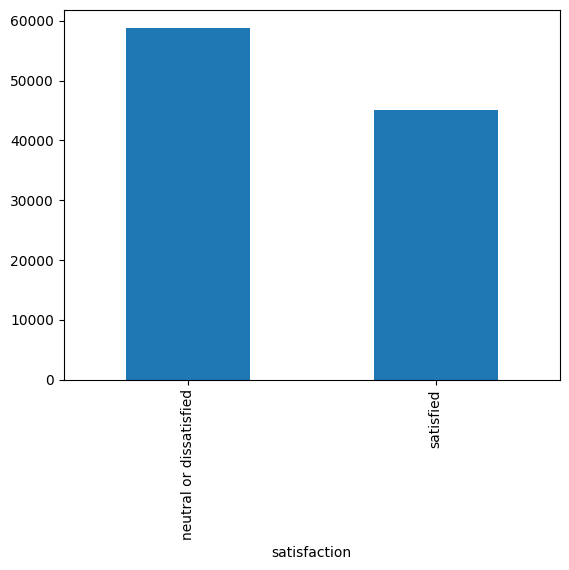

In [5]:
train['satisfaction'].value_counts().plot(kind='bar')

<b>Observations:</b>
* It can be observed that there is a data imbalance in the target values of the Training Data
* We will cater for this in Section 5: Feature Engineering

### <a id = "3.3"></a>3.3 - Determining the missing values
[Go back to the Table of Contents](#table_of_content)

In [6]:
print(pd.isnull(train).sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
print(pd.isnull(test).sum())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


<b>Observations:</b>
* Training Data:
    * Only Arrival Delay in Minutes has missing values (310)
    * The remaining columns have 0 missing values
* Test Data:
    * Only Arrival Delay in Minutes has missing values (83)
    * The remaining columns have 0 missing values

### <a id = "3.4"></a>3.4 - Filling Missing Values
[Go back to the Table of Contents](#table_of_content)

In [8]:
print(train.shape[0])
print(test.shape[0])

103904
25976


In [9]:
train.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
train = train.reset_index()

In [10]:
test.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
test = test.reset_index()
IDtest = test["id"]

In [11]:
print(pd.isnull(train).sum())

index                                0
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction             

In [12]:
print(pd.isnull(test).sum())

index                                0
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction             

<b>Observations:</b>
* No more missing values

### <a id = "3.5"></a>3.5 - Checking for Outliers
[Go back to the Table of Contents](#table_of_content)

In [13]:
train1 = train.select_dtypes(exclude="object")

In [14]:
def check_outliers(dataframe):
    #determining the upper and lower quartiles
    Quart1 = dataframe.quantile(0.25)
    Quart3 = dataframe.quantile(0.75)

    #determining the upper and lower outlier thresholds to remove the outliers
    upper_outlier_threshold = Quart3 + (Quart3 - Quart1) * 1.5
    lower_outlier_threshold = Quart1 - (Quart3 - Quart1) * 1.5

    #finding the number of outliers in each column
    outliers = ((dataframe > upper_outlier_threshold) | (dataframe < lower_outlier_threshold)).sum()
    percent_outliers = round((outliers*100/len(dataframe)), 4)
    dataframe = pd.DataFrame({'Number of Outliers': outliers, 
                              'Percentage Outliers': percent_outliers}
                            ).reset_index()
    dataframe.index.name = 'Feature'
    return dataframe

In [15]:
train_outliers = check_outliers(train1)
train_outliers

,index,Number of Outliers,Percentage Outliers
Feature,,,
0,index,0,0.0000
1,Unnamed: 0,0,0.0000
2,id,0,0.0000
3,Age,0,0.0000
4,Flight Distance,2287,2.2077
5,Inflight wifi service,0,0.0000
6,Departure/Arrival time convenient,0,0.0000
7,Ease of Online booking,0,0.0000
8,Gate location,0,0.0000


In [16]:
test1 = test.select_dtypes(exclude="object")
test_outliers = check_outliers(test1)
test_outliers

,index,Number of Outliers,Percentage Outliers
Feature,,,
0,index,0,0.0000
1,Unnamed: 0,0,0.0000
2,id,0,0.0000
3,Age,0,0.0000
4,Flight Distance,580,2.2400
5,Inflight wifi service,0,0.0000
6,Departure/Arrival time convenient,0,0.0000
7,Ease of Online booking,0,0.0000
8,Gate location,0,0.0000


<b>Observations:</b>
* It can be observed that four features have outliers associated with them namely, Inflight wifi service, Checkin service, Departure Delay in Minutes, Arrival Delay in Minutes
* Yet it can also be observed that these outliers are entirely possible situations
    * There were very long flights 
    * There were very long delays in departure and arrival, with a max of 1590 and 1572 minutes
    * Checkin services have 1 ratings which is also possible

<b>Decisions:</b>
* It is advisable not to remove the outliers
* There is a common belief in statistics that if outliers are not errors, they should not be removed as they might give important information about the data

### <a id = "3.6"></a>3.6 - Joining Train/Test
[Go back to the Table of Contents](#table_of_content)

* Inorder to ensure that the training and testing datasets both have a similar layout, we must first combine the two datasets

In [17]:
print(train.shape[0])

103594


In [18]:
print(test.shape[0])

25893


In [19]:
df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
df.describe(include = "all")

,index,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129487.000000,129487.000000,129487.000000,129487,129487,129487.000000,129487,129487,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487
unique,NaN,NaN,NaN,2,2,NaN,2,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,NaN,65703,105773,NaN,89445,61990,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73225
mean,44158.973480,44158.973480,64958.335169,NaN,NaN,39.428761,NaN,NaN,1190.210662,2.728544,...,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,NaN
std,31209.526335,31209.526335,37489.781165,NaN,NaN,15.117597,NaN,NaN,997.560954,1.329235,...,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16230.000000,16230.000000,32494.500000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,38966.000000,38966.000000,64972.000000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,71440.500000,71440.500000,97415.500000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


### <a id = "3.7"></a>3.7 - Removing Initial Insignificant Features
[Go back to the Table of Contents](#table_of_content)

* Three features have no significance in the dataset and are just identifiers of index, row numbers and ID of customers
* These features must first be removed as including them in the dataset for the model can create problems in predictions

In [20]:
df = df.drop(["index", "Unnamed: 0", "id"], axis=1)
df.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
3926,Male,Loyal Customer,42,Personal Travel,Eco,928,1,3,1,4,...,3,3,3,3,4,3,3,14,17.0,neutral or dissatisfied
79046,Male,Loyal Customer,27,Business travel,Business,738,2,2,2,2,...,3,3,2,4,4,5,3,12,0.0,satisfied
63190,Male,Loyal Customer,8,Personal Travel,Eco,1121,3,5,3,3,...,5,3,5,3,3,4,5,0,0.0,neutral or dissatisfied
29052,Male,Loyal Customer,53,Business travel,Business,843,2,2,2,2,...,5,5,5,5,4,5,2,0,29.0,satisfied
105714,Male,Loyal Customer,60,Business travel,Business,3301,2,2,2,2,...,4,4,4,4,3,4,4,19,27.0,satisfied


## <a id = "4"></a>4 - Visualizing and Comparing the Features
[Go back to the Table of Contents](#table_of_content)

First let's map the target values from categorical to numeric

In [21]:
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})
df.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
126893,Female,disloyal Customer,26,Business travel,Business,1065,4,0,4,4,...,5,3,2,4,4,5,5,0,0.0,0
93047,Female,disloyal Customer,32,Business travel,Business,227,2,1,1,1,...,2,5,5,5,5,4,2,0,0.0,0
124305,Female,Loyal Customer,23,Business travel,Business,1713,2,5,5,5,...,2,1,2,3,1,4,2,13,3.0,0
114765,Female,Loyal Customer,48,Business travel,Business,2543,3,3,2,3,...,4,4,4,4,4,4,5,0,0.0,1
104491,Male,Loyal Customer,59,Business travel,Business,951,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


### <a id = "4.1"></a>4.1 - Comparing the effect of different categorical features on customer satisfaction
[Go back to the Table of Contents](#table_of_content)

In [22]:
#My function to visualize and count the values in each category of each feature
def bar_plot(variable):
    #This code is used to solve problem when there are is No Satisfaction for a category, which causes an error in the display code
    feature_categories = df[variable].sort_values().unique()
    for category in feature_categories:
        temp_series = df["satisfaction"][df[variable] == category].value_counts(normalize = True)
        print("Fraction of {} = {} who are Satisfied:".format(variable, category), temp_series[1])
    #visualize
    sns.barplot(x = df[variable],y = df["satisfaction"],  data = df).set_title('Fraction Customer Satisfaction With Respect To {}'.format(variable))

#### <a id = "4.1.1"></a>4.1.1 - Gender
[Go back to the Table of Contents](#table_of_content)

Fraction of Gender = Female who are Satisfied: 0.42888452582073877
Fraction of Gender = Male who are Satisfied: 0.44028282954973036


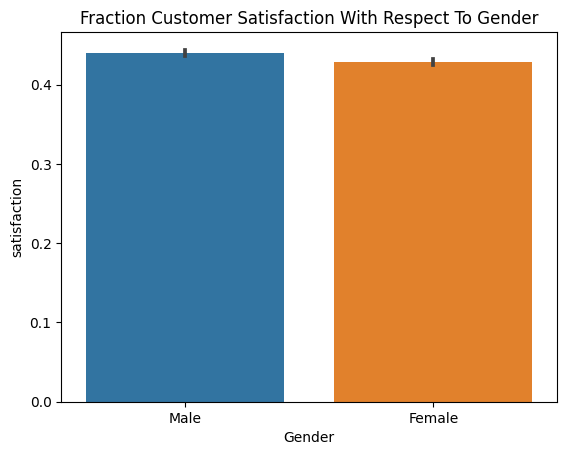

In [23]:
bar_plot("Gender")

<b>Observations:</b>
* Of all the female customers, about 43% are satisfied
* Of all the male customers, about 44% are satisfied
* It can be concluded that the feature "<b><i>Gender</i></b>" plays negligible part in determining customer satisfaction 

#### <a id = "4.1.2"></a>4.1.2 - Customer Type
[Go back to the Table of Contents](#table_of_content)

Fraction of Customer Type = Loyal Customer who are Satisfied: 0.47813714274909475
Fraction of Customer Type = disloyal Customer who are Satisfied: 0.23985831154592224


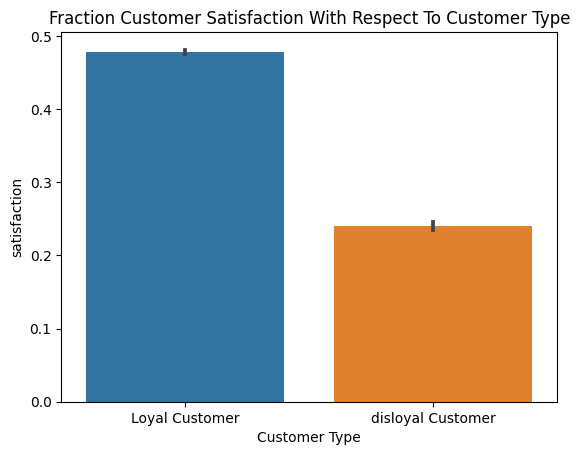

In [24]:
bar_plot("Customer Type")

<b>Observations:</b>
* Of all the Loyal Customers, about 48% are satisfied
* Of all the Disloyal Customers, only 24% are satisfied
* It can be concluded that the feature "<b><i>Customer Type</i></b>" plays a significant part in determining customer satisfaction

#### <a id = "4.1.3"></a>4.1.3 - Type of Travel
[Go back to the Table of Contents](#table_of_content)

Fraction of Type of Travel = Business travel who are Satisfied: 0.5836771200178881
Fraction of Type of Travel = Personal Travel who are Satisfied: 0.10126866789870635


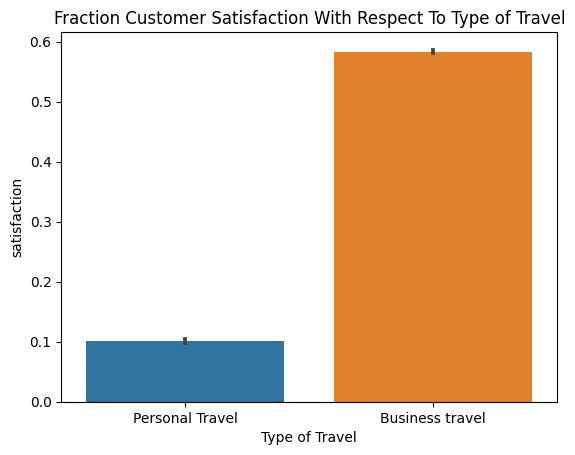

In [25]:
bar_plot("Type of Travel")

<b>Observations:</b>
* Of all the Customers on Business Travel, about 58% are satisfied
* Of all the Customers on Personal Travel, only 10% are satisfied
* Travelers on business trips are highly satisfied with the airline where as travelers on personal trips are mostly dissatisfied
    * This can be due to the fact the travelers on business trips usually travel in business class and get almost all the amenities
    * Where as people on personal trips usually travel in economy class and do not have all the facilities available
* It can be concluded that the feature "<b><i>Type of Travel</i></b>" plays a significant part in determining customer satisfaction

#### <a id = "4.1.4"></a>4.1.4 - Travel Class
[Go back to the Table of Contents](#table_of_content)

Fraction of Class = Business who are Satisfied: 0.6944668494918536
Fraction of Class = Eco who are Satisfied: 0.18758710876335669
Fraction of Class = Eco Plus who are Satisfied: 0.2462686567164179


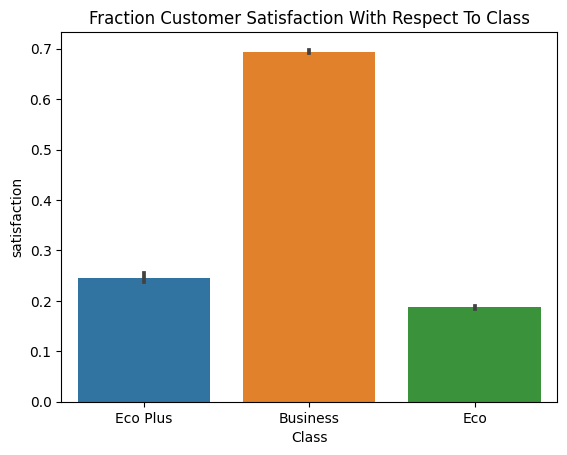

In [26]:
bar_plot("Class")

<b>Observations:</b>
* Of all the Customers Travelling in Business Class, almost 70% are satisfied
* Of all the Customers Travelling in Economy Plus, almost 25% are satisfied
* Of all the Customers Travelling in Economy, almost 25% are satisfied
* Business class travelers are highly satisfied with the airline where as economy and economy plus travelers are mostly dissatisfied
* It can be concluded that the feature "<b><i>Class</i></b>" plays a significant part in determining customer satisfaction

### <a id = "4.2"></a>4.2 Heatmap of Remaining Features with Satisfaction
[Go back to the Table of Contents](#table_of_content)

<Axes: >

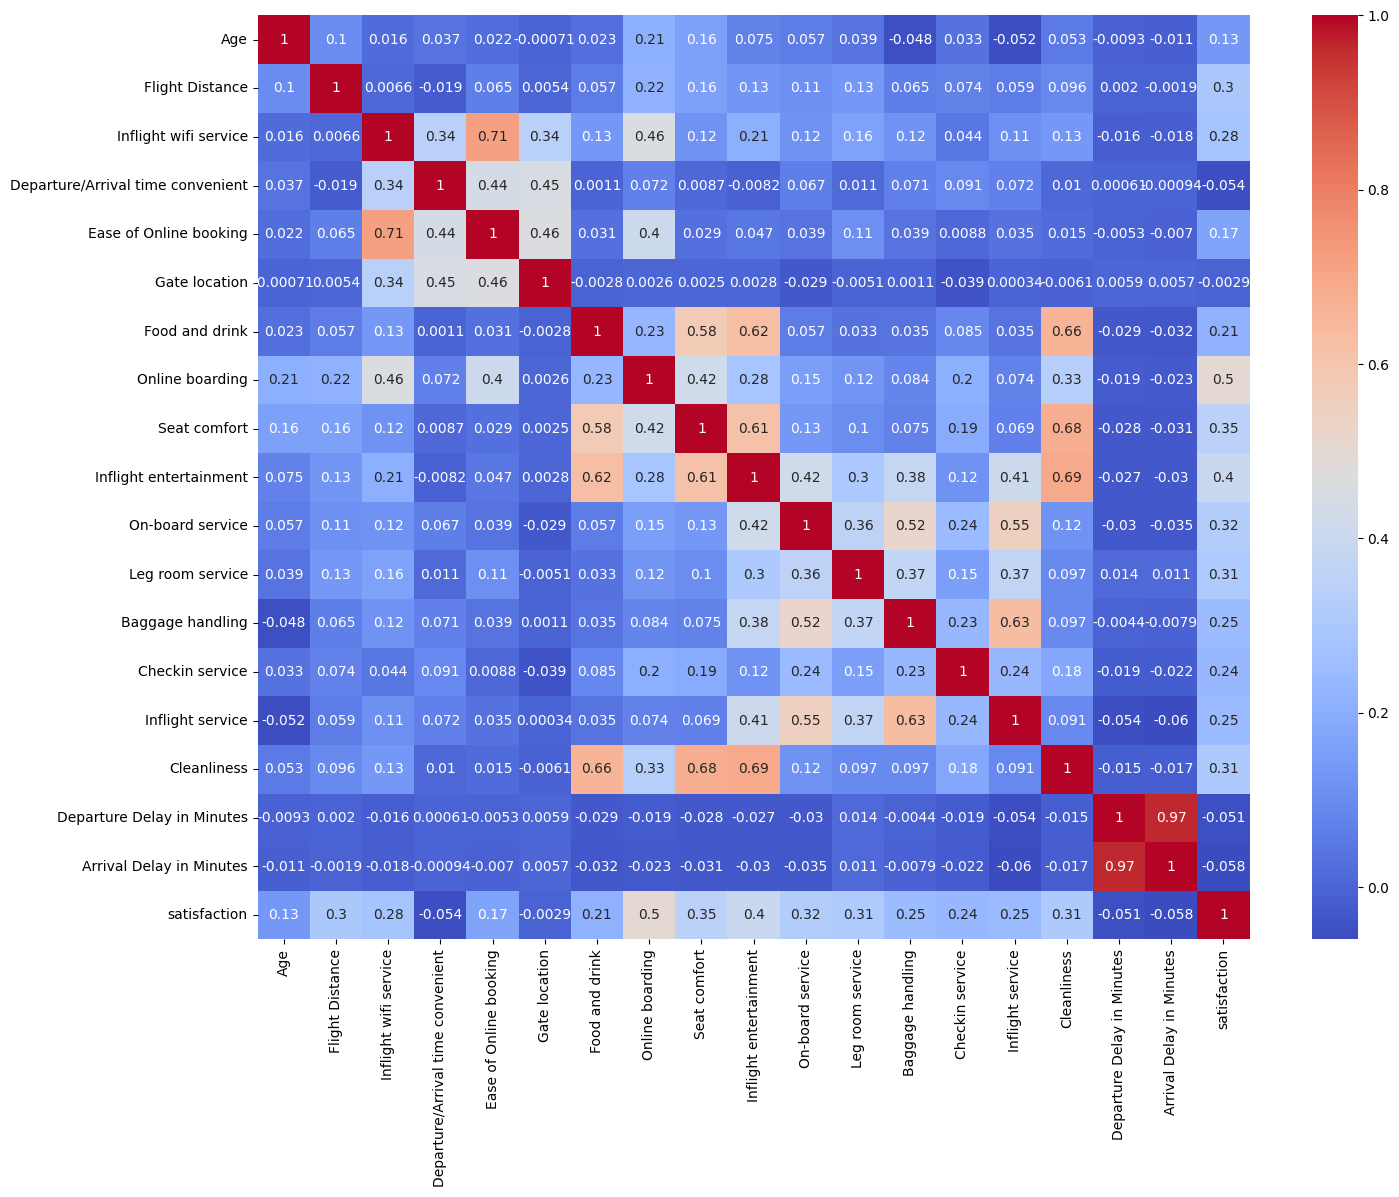

In [27]:
features = df.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df[list(features.columns)].corr(), cmap = 'coolwarm', annot = True, ax=ax)

<b>Observations</b>
* It can be observed that two customer rating features (Departure/Arrival time convenient and Gate location), play negligible part in customer satisfaction
* These two features can be removed as they will add complexity for the model without adding any information
* The rest of the customer ratings play a part in the in the overall customer satisfaction

### <a id = "4.3"></a>4.3 - Exploring Distribution of Ratings by Customers for Various Airline Services 
[Go back to the Table of Contents](#table_of_content)

<b>Decisions:</b>
* Since Gate Location and Departure/Arrival time convenient are to be dropped, we will not be involving them in any more analysis
* We will cater for the continous variables including Age, Departure Delay in Minutes, Arrival Delay in Minutes, and Flight Distance in the subsequent section
* We do not need the target value (satisfaction) as this is only a study of the distribution of various ratings

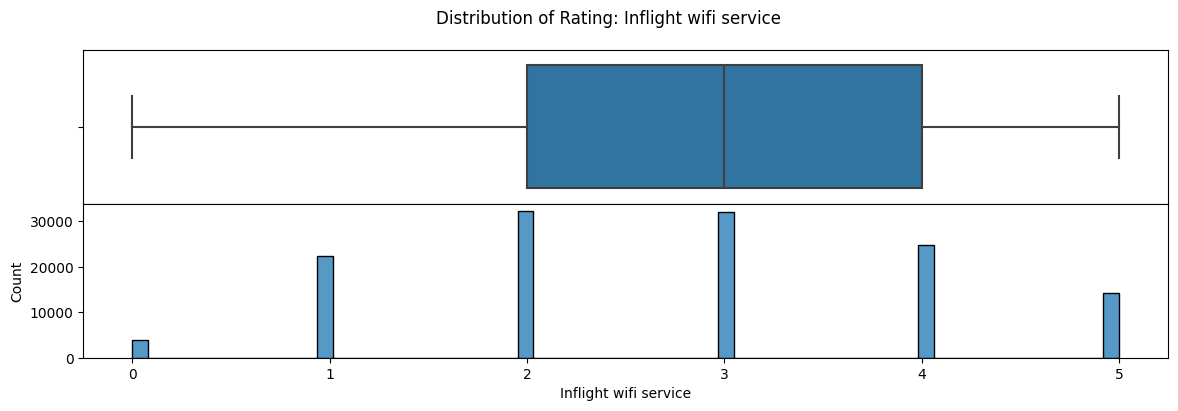

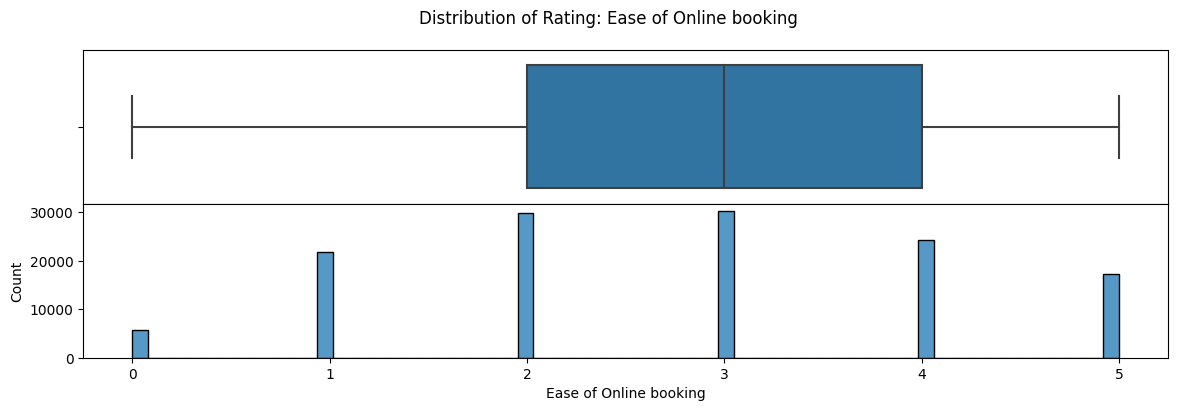

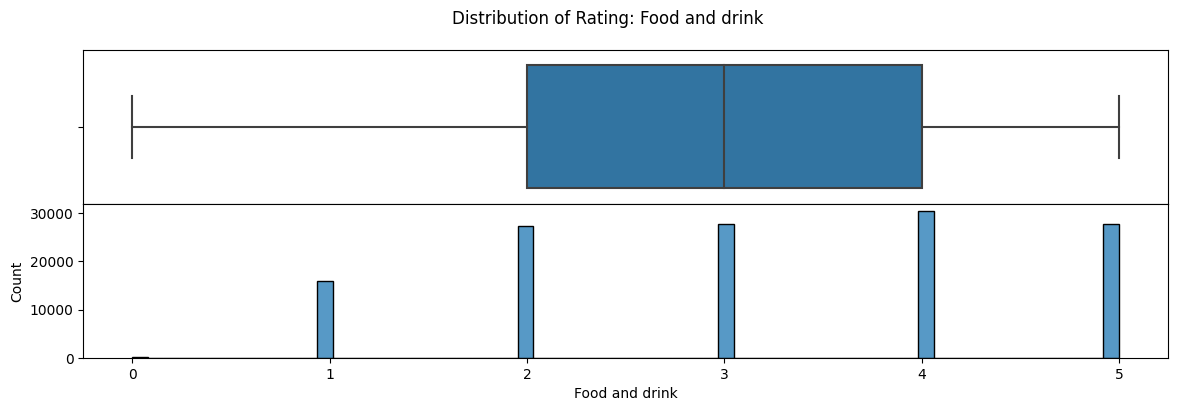

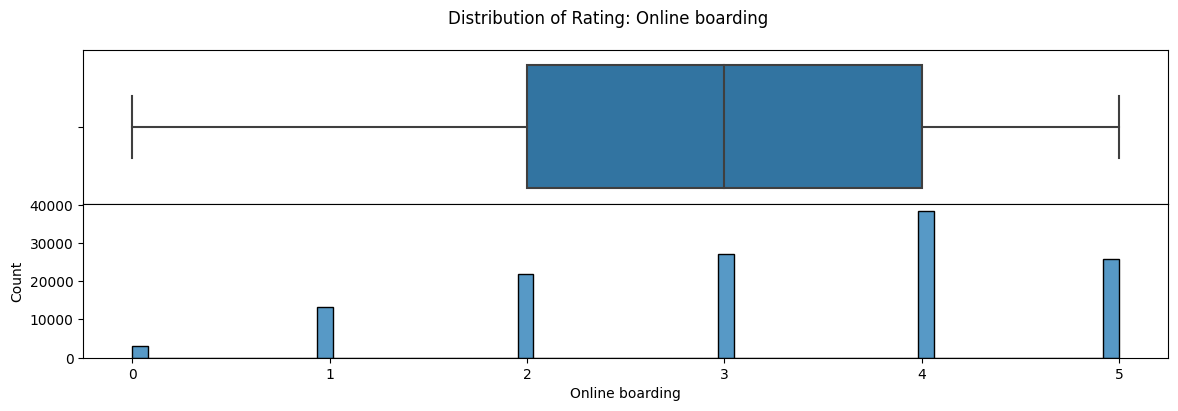

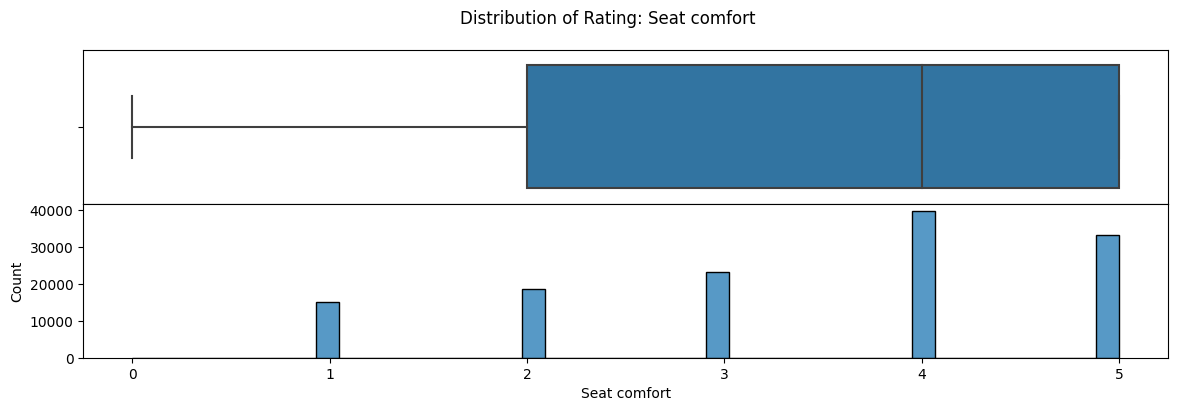

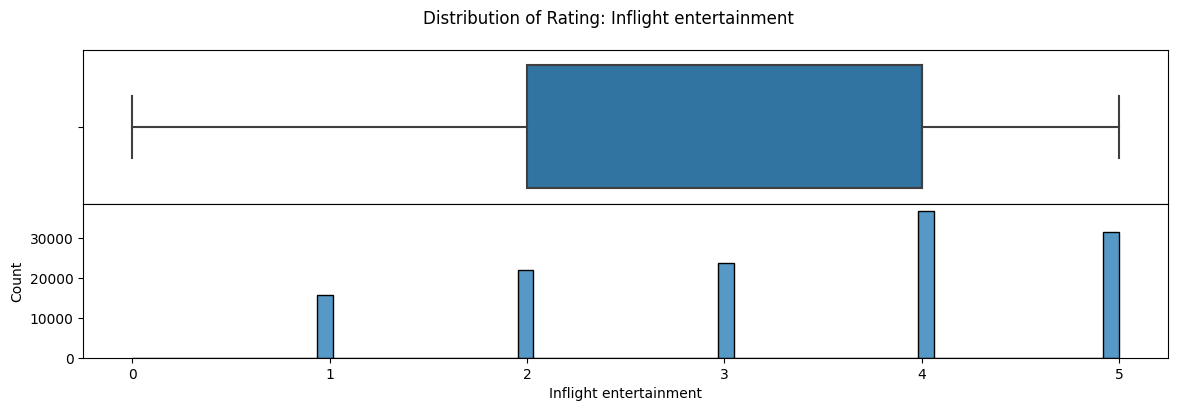

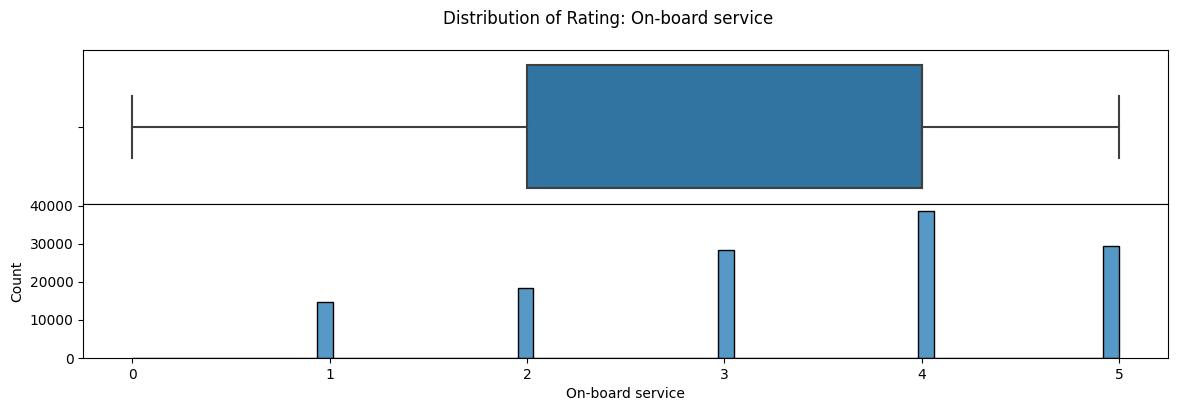

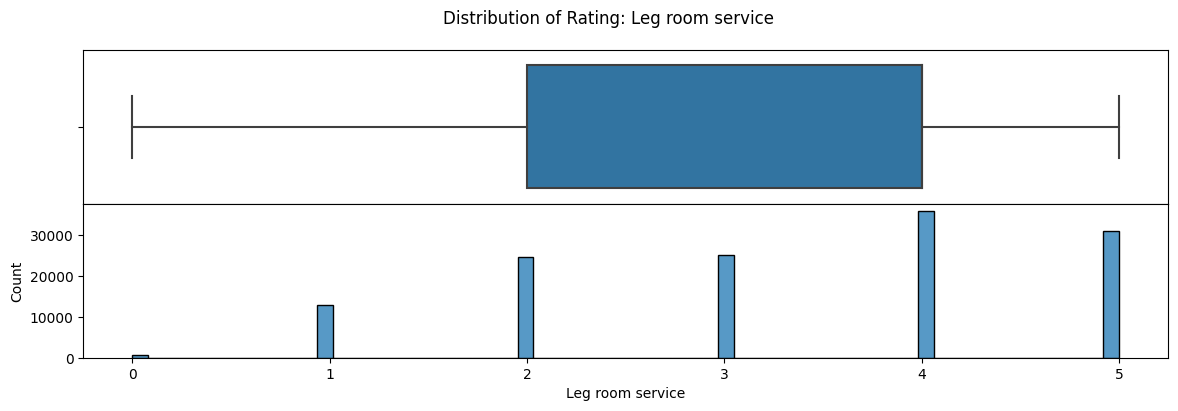

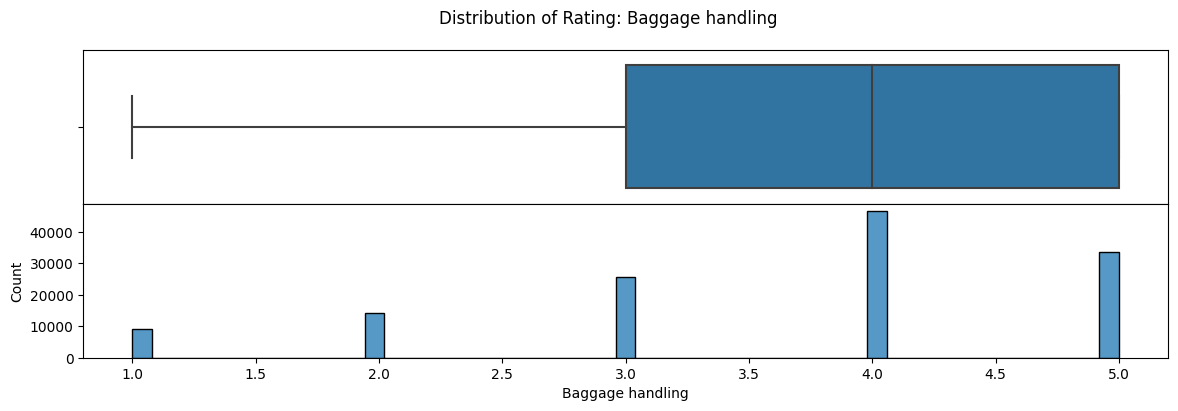

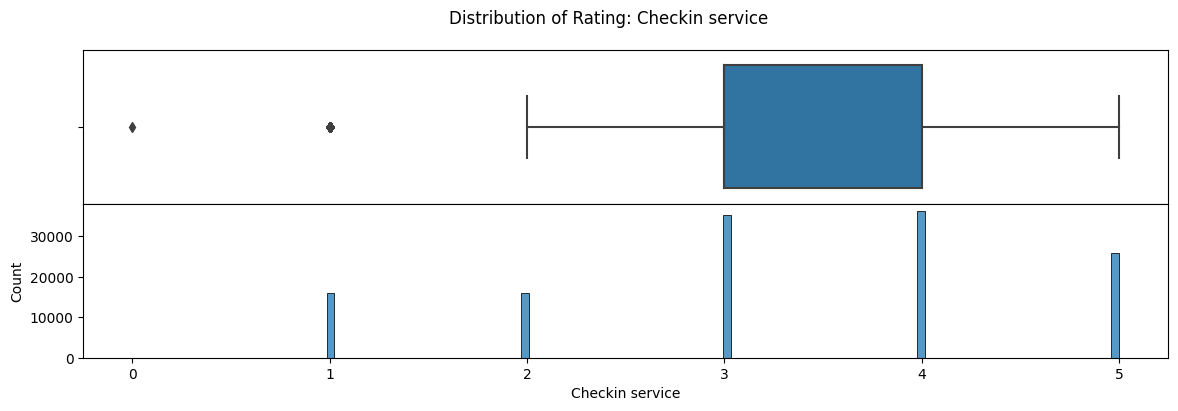

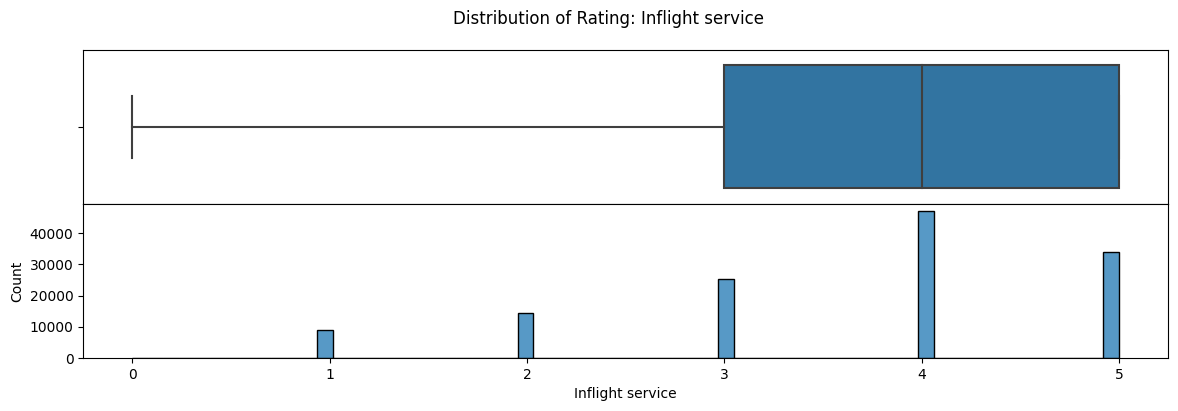

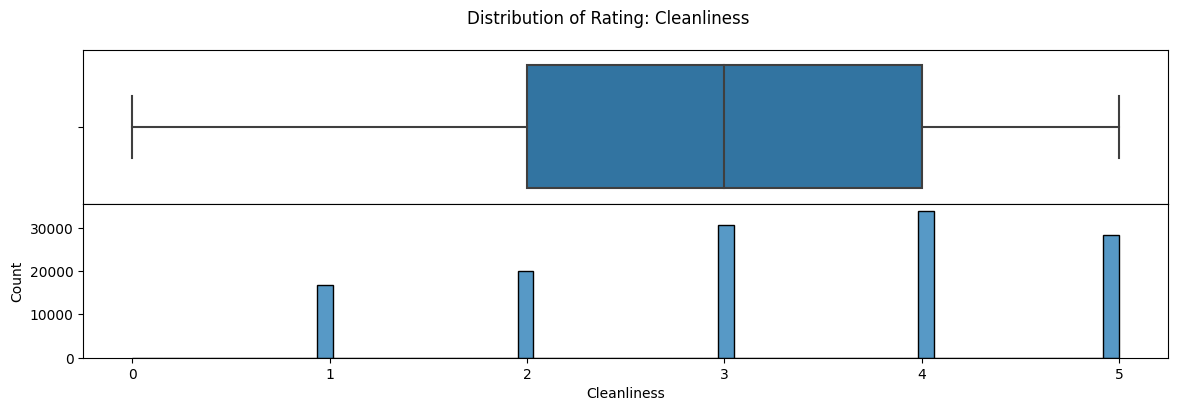

In [28]:
features = df.select_dtypes(exclude='object').drop(["satisfaction", 
                                                    "Age", 
                                                    "Departure Delay in Minutes", 
                                                    "Arrival Delay in Minutes", 
                                                    "Flight Distance", 
                                                    "Gate location",
                                                    "Departure/Arrival time convenient"], axis=1)
for col in features:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14, 4))
    plt.suptitle(f"Distribution of Rating: {col}")
    sns.boxplot(data=df, x=col, ax=ax1)
    sns.histplot(data=df, x=col, ax=ax2)
    plt.subplots_adjust(hspace=0)
    plt.show()

<b>Observations:</b>
* It can be observed that multiple ratings have 0 value as a rating which is Not applicable and must be catered for
* Either we can drop these ratings over we can use a median to fill in the 0 ratings with a value between 1-5

### <a id = "4.4"></a>4.4 - Filling Non Applicable Ratings
[Go back to the Table of Contents](#table_of_content)

In [29]:
features = df.select_dtypes(exclude='object').drop(["satisfaction", 
                                                    "Age", 
                                                    "Departure Delay in Minutes", 
                                                    "Arrival Delay in Minutes", 
                                                    "Flight Distance", 
                                                    "Gate location",
                                                    "Departure/Arrival time convenient"], axis=1)
for rating in features:
    df[rating] = df[rating].replace(0, df[rating].median())

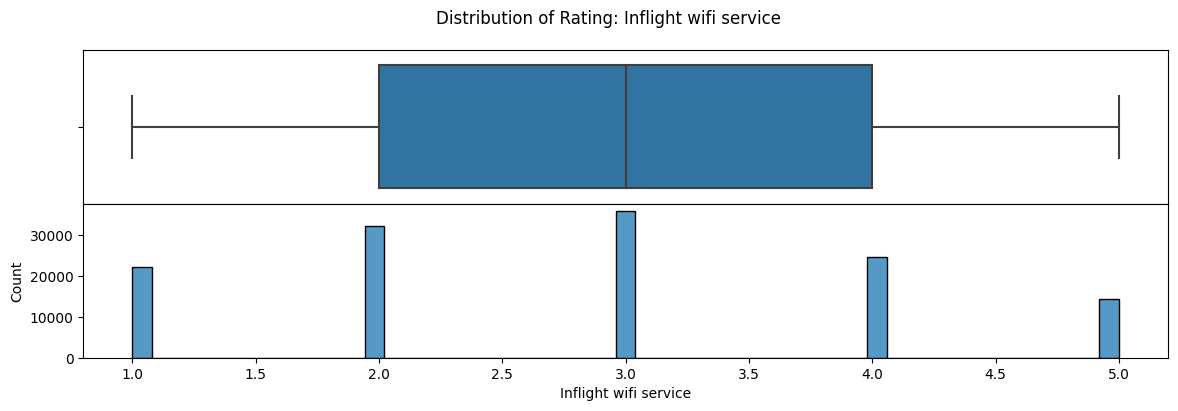

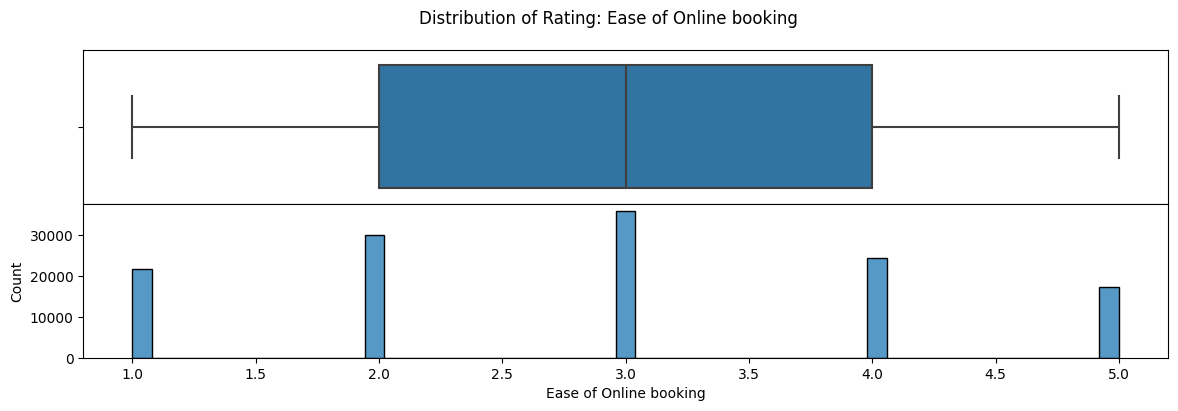

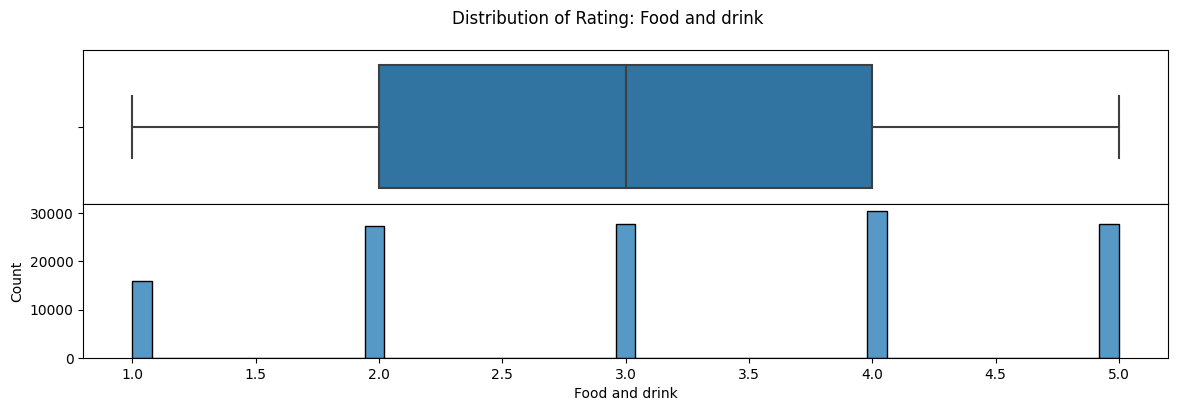

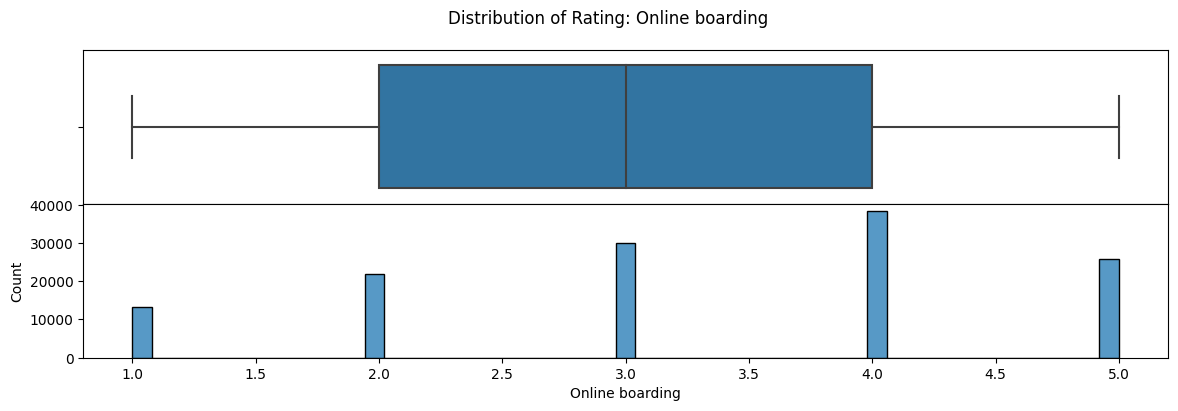

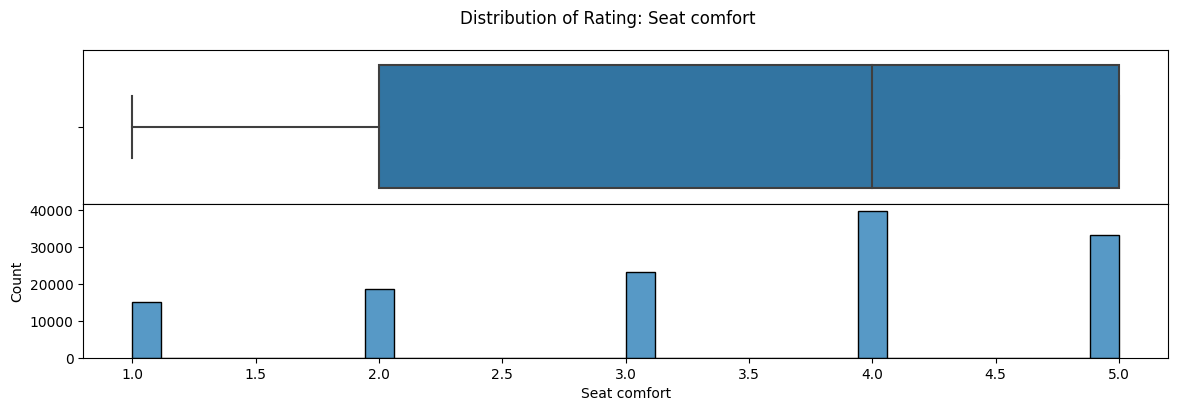

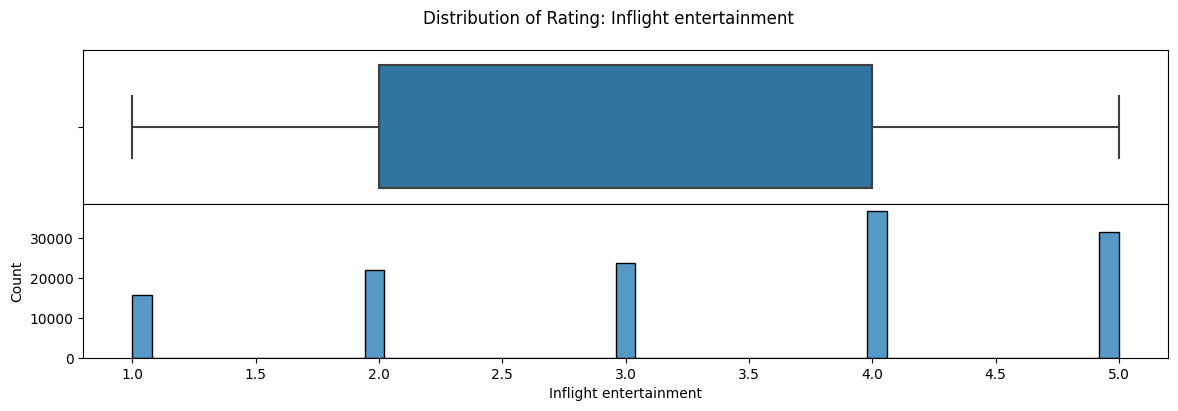

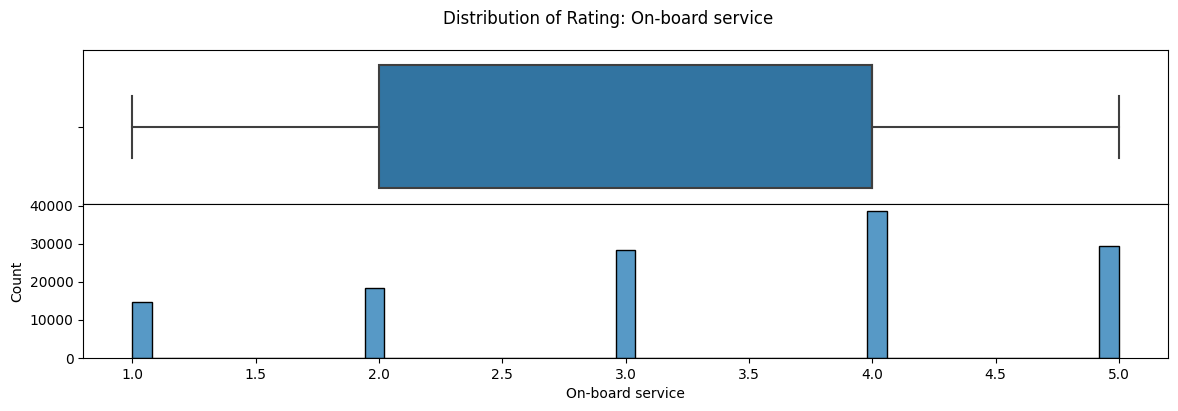

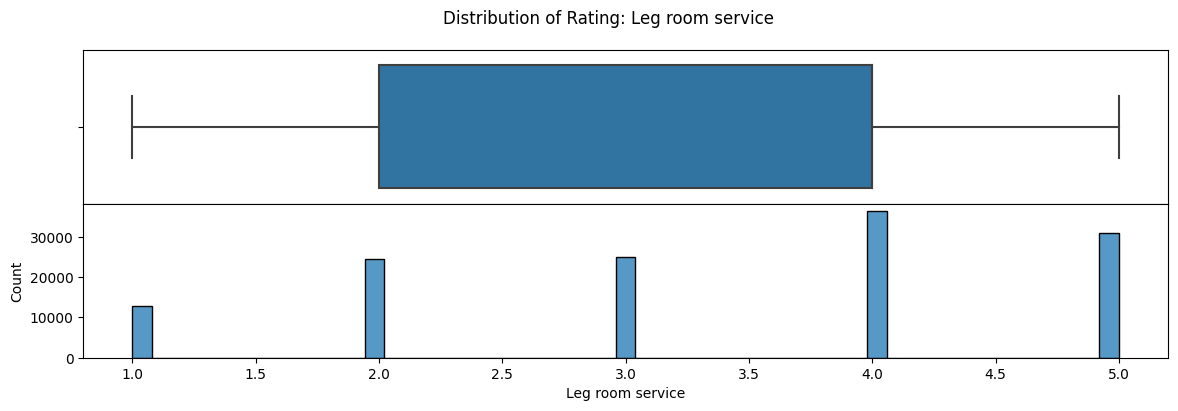

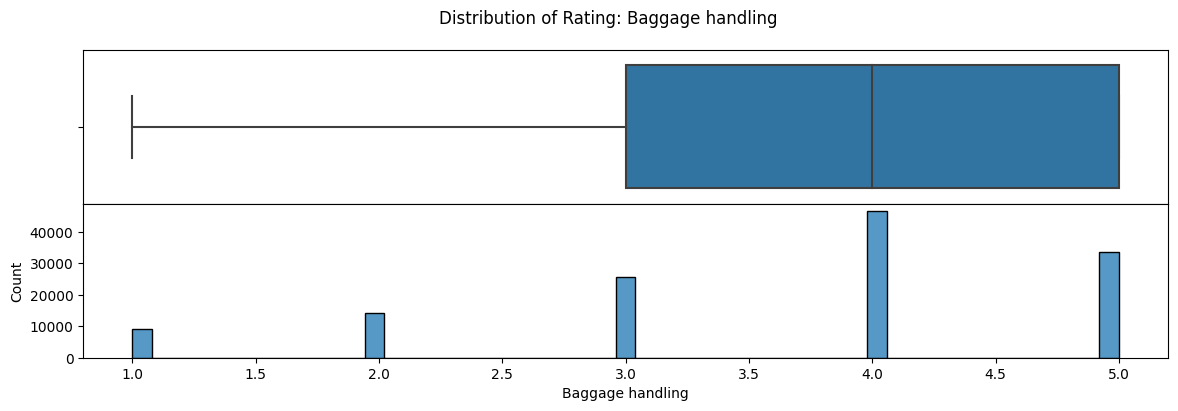

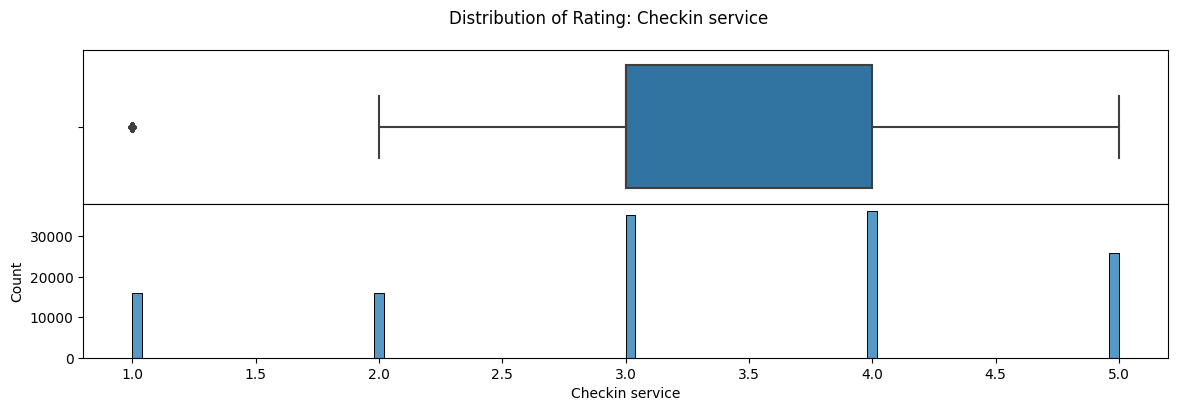

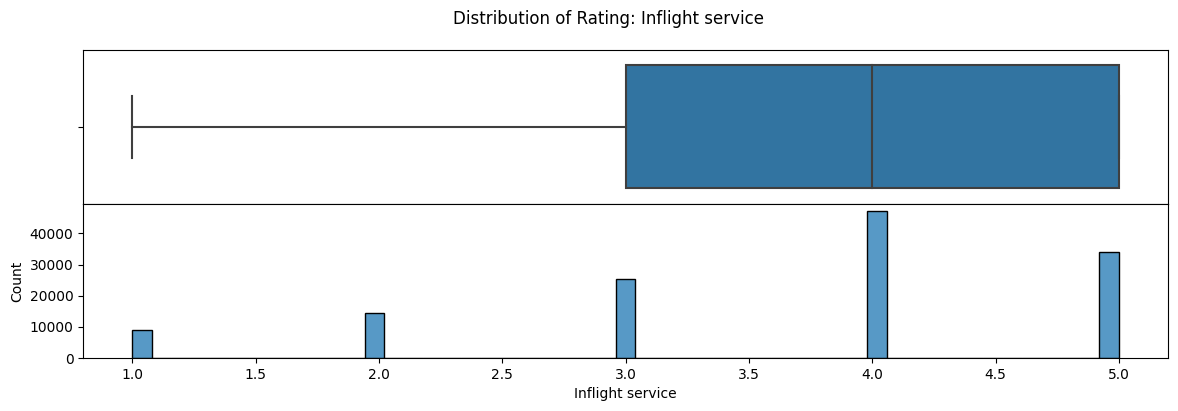

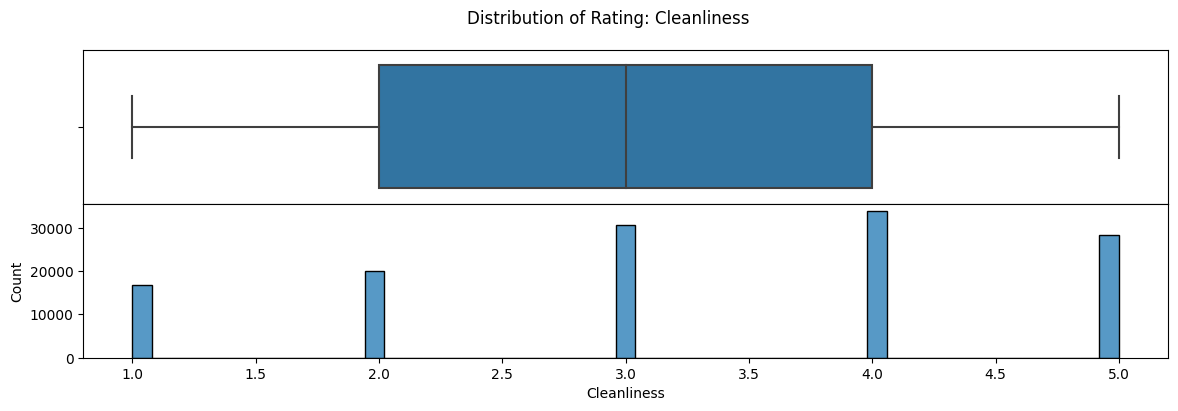

In [30]:
for col in features:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14, 4))
    plt.suptitle(f"Distribution of Rating: {col}")
    sns.boxplot(data=df, x=col, ax=ax1)
    sns.histplot(data=df, x=col, ax=ax2)
    plt.subplots_adjust(hspace=0)
    plt.show()

<b>Observations:</b>
* Now we can see that the ratings lie between 1-5 and still have a similar distribution

### <a id = "4.5"></a>4.5 - Exploring How Different Ratings Contribute to Customer Satisfaction
[Go back to the Table of Contents](#table_of_content)

In [31]:
#My function to visualize and count the values in each category of each feature
def multiple_bar_plot(variables, rows=2, cols=6):
    #This code is used to solve problem when there are is No Satisfaction for a category, which causes an error in the display code
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
    fig.suptitle("Customer Satisfaction with Respect to Various Ratings")
    plt.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.2, wspace=0.6)
    iter1 = 0
    for i in range(cols):
        for j in range(rows):
            g = sns.barplot(x = df[variables[iter1]], y = df["satisfaction"], ax=axs[j][i]).set_ylabel("Customer Satisfaction")
            iter1 += 1

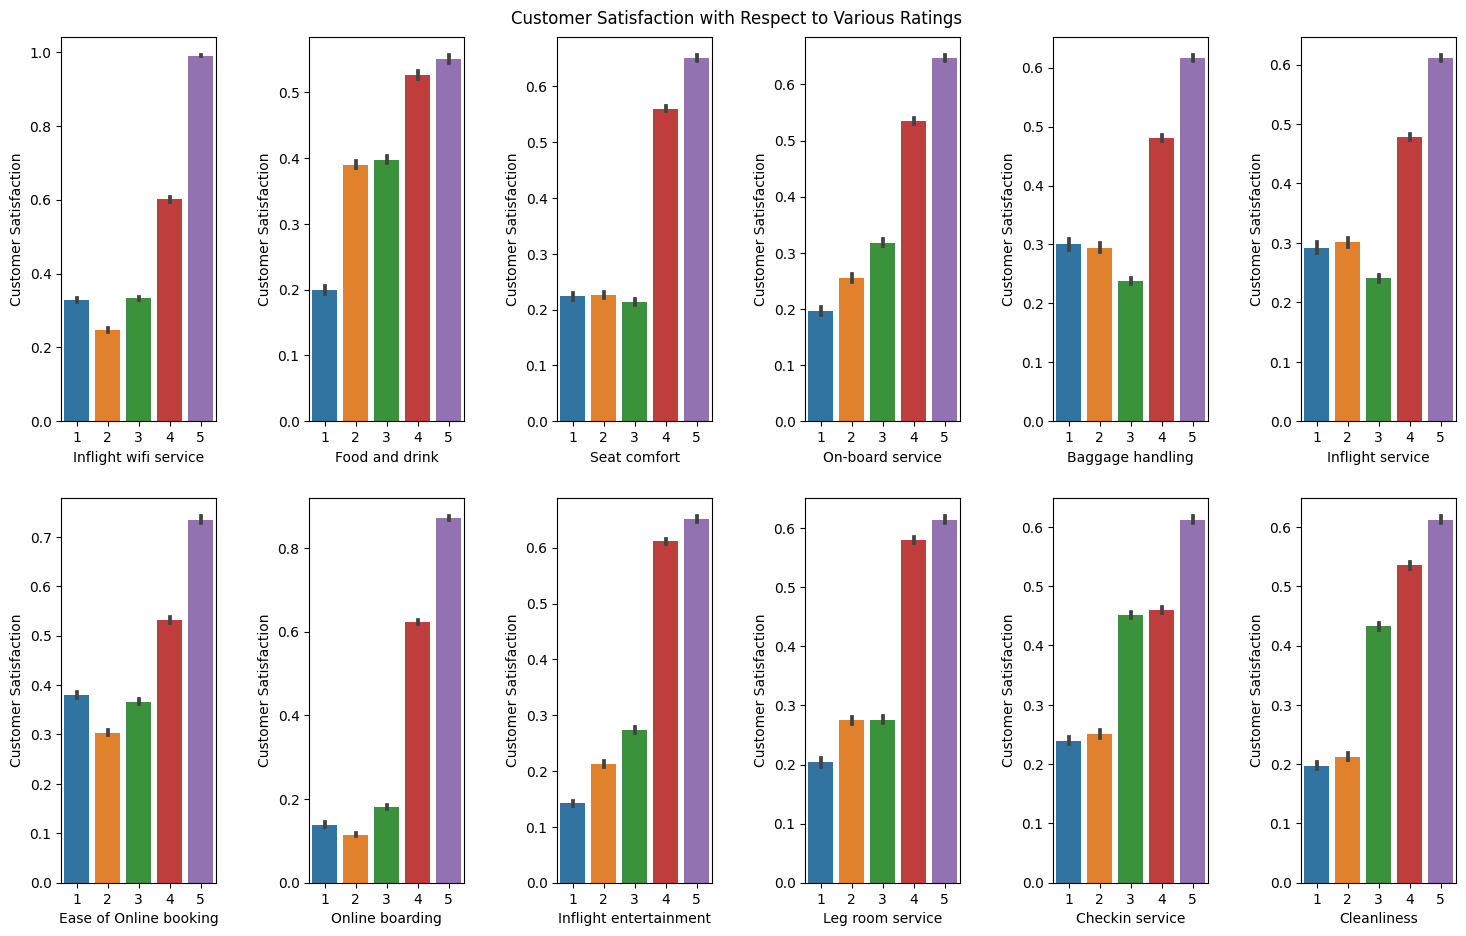

In [32]:
multiple_bar_plot(features.columns)

<b>Observations:</b>
* It can be observed from the above barplots that higher the rating of the different services provided by the airline, the higher the satisfaction rate
* Thus all the ratings play an important part in determining customer satisfaction rate


## <a id = "5"></a>5 -  Feature Engineering
[Go back to the Table of Contents](#table_of_content)

### <a id = "5.1"></a>5.1 - Checking for Skewness in Continous Features
[Go back to the Table of Contents](#table_of_content)

In [33]:
#My function to visualize and count the values in each category of each feature
def multiple_dist_plot(dataframe, variables, rows=2, cols=2):
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    fig.suptitle("Skewness")
    plt.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.3, wspace=0.6)
    iter1 = 0
    for i in range(rows):
        for j in range(cols):
            #g = sns.distplot(x = df[variables[iter1]], ax=axs[i][j], color="m", label="Skewness : %.2f"%(df[variables[iter1]].skew()))
            g = sns.kdeplot(data = dataframe, x = variables[iter1], ax=axs[i][j], label="Skewness : %.2f"%(df[variables[iter1]].skew()))
            g = g.legend(loc="best")
            iter1 += 1

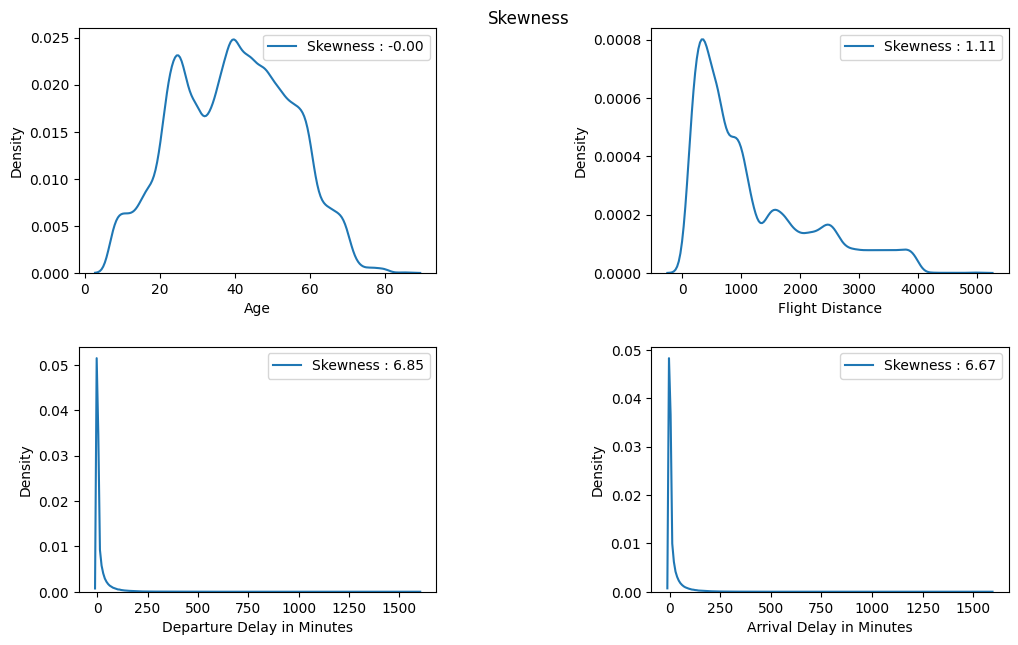

In [34]:
cont_features = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
multiple_dist_plot(df, cont_features, 2, 2)

<b>Observations:</b>
* As we can see three of the four continous valued variables are highly skewed
* We need to remove the skewness and bring the distribution close to a Normal Distribution

### <a id = "5.2"></a>5.2 - Correcting Skewness in Continous Features
[Go back to the Table of Contents](#table_of_content)

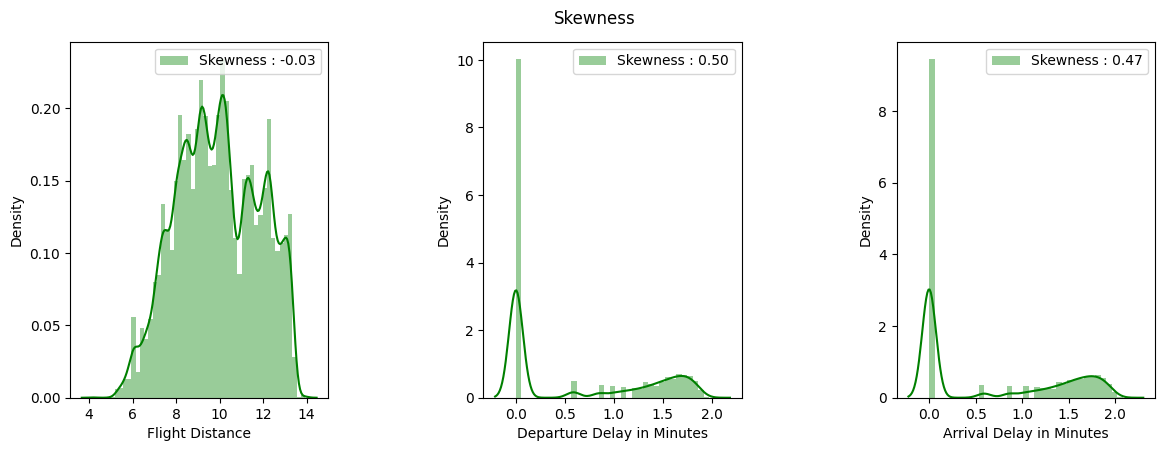

In [35]:
from scipy.stats import skew, yeojohnson
cont_features = ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
fig, axs = plt.subplots(ncols=3, figsize=(14, 4))
fig.suptitle("Skewness")
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.3, wspace=0.6)
for i, feature in enumerate(cont_features):
    a = yeojohnson(np.array(df[feature]))
    df[feature] = pd.Series(a[0])
    g = sns.distplot(df[feature], color="g", ax=axs[i], label="Skewness : %.2f"%(df[feature].skew())).legend(loc="best")

### <a id = "5.3"></a>5.3 - Removing Non-Essential Features
[Go back to the Table of Contents](#table_of_content)

<b>Decisions:</b>
* Three specific features play negligible part in determining customer satisfaction
* These features are: "Gender", "Gate Location", "Departure/Arrival time convenient"
* We will remove these features to simplify the model training

In [36]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,8.680289,3,4,3,1,...,5,4,3,4,4,5,5,1.619653,1.603123,0
1,Male,disloyal Customer,25,Business travel,Business,7.432045,3,2,3,3,...,1,1,5,3,1,4,1,0.586955,1.280140,0
2,Female,Loyal Customer,26,Business travel,Business,10.523016,2,2,2,2,...,5,4,3,4,4,4,5,-0.000000,-0.000000,1
3,Female,Loyal Customer,25,Business travel,Business,9.070650,2,5,5,5,...,2,2,5,3,1,4,2,1.431293,1.413044,0
4,Male,Loyal Customer,61,Business travel,Business,7.265314,3,3,3,3,...,3,3,4,4,3,3,3,-0.000000,-0.000000,1


In [37]:
df = df.drop(["Gender", "Gate location", "Departure/Arrival time convenient"], axis=1)

In [38]:
df.describe(include="all")

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129487,129487.000000,129487,129487,129487.000000,129487.000000,129487.000000,129487.000000,129487.00000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
unique,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,105773,NaN,89445,61990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.428761,NaN,NaN,9.913894,2.819086,2.888058,3.207697,3.32387,3.441620,3.358623,3.383359,3.369489,3.631886,3.306262,3.642528,3.286546,0.621836,0.656978,0.434499
std,NaN,15.117597,NaN,NaN,1.872024,1.239434,1.271794,1.326035,1.25291,1.319134,1.333583,1.286866,1.296963,1.180082,1.266113,1.176398,1.313183,0.745801,0.779623,0.495693
min,NaN,7.000000,NaN,NaN,4.198645,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.000000,-0.000000,0.000000
25%,NaN,27.000000,NaN,NaN,8.478332,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,-0.000000,-0.000000,0.000000
50%,NaN,40.000000,NaN,NaN,9.889935,3.000000,3.000000,3.000000,3.00000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,NaN,51.000000,NaN,NaN,11.444977,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.454294,1.519736,1.000000


### <a id = "5.4"></a>5.4 - One-hot Encoding Categorical Values
[Go back to the Table of Contents](#table_of_content)

<b>Decisions:</b>
* We will only one-hot encode categorical features which do not have an ordinal relationship
* Features such as the customer ratings are ordinal relationships and thus does not need one-hot encoding
* The features we will one-hot encode are:
    * Customer Type
    * Type of Travel
    * Class

In [39]:
df = pd.get_dummies(df, columns = ['Customer Type', 'Type of Travel', 'Class'], dtype=int) 
df.describe(include="all")

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.00000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,9.913894,2.819086,2.888058,3.207697,3.32387,3.441620,3.358623,3.383359,3.369489,...,0.621836,0.656978,0.434499,0.816862,0.183138,0.690764,0.309236,0.478735,0.448825,0.072440
std,15.117597,1.872024,1.239434,1.271794,1.326035,1.25291,1.319134,1.333583,1.286866,1.296963,...,0.745801,0.779623,0.495693,0.386781,0.386781,0.462180,0.462180,0.499550,0.497376,0.259216
min,7.000000,4.198645,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,8.478332,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,...,-0.000000,-0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,9.889935,3.000000,3.000000,3.000000,3.00000,4.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,11.444977,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000,4.000000,...,1.454294,1.519736,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,85.000000,13.921107,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,1.971637,2.079571,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <a id = "5.5"></a>5.5 - Splitting the Train and Test Data
[Go back to the Table of Contents](#table_of_content)

In [40]:
train = df[:train.shape[0]]
test = df[train.shape[0]:]

In [41]:
print(train.shape)
print(test.shape)


(103594, 24)
(25893, 24)


In [42]:
X_train = train.drop("satisfaction", axis=1)
y_train = train["satisfaction"]
X_test = test.drop("satisfaction", axis=1)
y_test = test["satisfaction"]

### <a id = "5.6"></a>5.6 - Correcting Data Imbalance in Training Dataset
[Go back to the Table of Contents](#table_of_content)

Counter({0: 58697, 1: 44897})


<Axes: xlabel='satisfaction'>

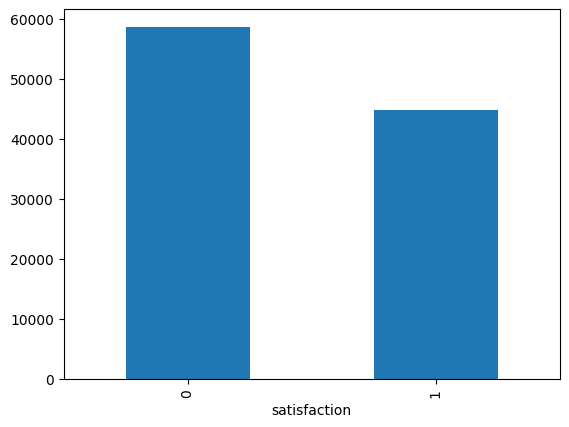

In [43]:
counter = Counter(y_train)
print(counter)
y_train.value_counts().plot(kind='bar')

<b>Observations:</b>
* As we can see, there is an imbalance in target classes
<b>Decisions:</b>
* As we discussed earlier, there is an imbalance in the two classes
* Neural or Dissatisfied Customers are more than Satisfied Customers

Counter({0: 58697, 1: 58697})


<Axes: xlabel='satisfaction'>

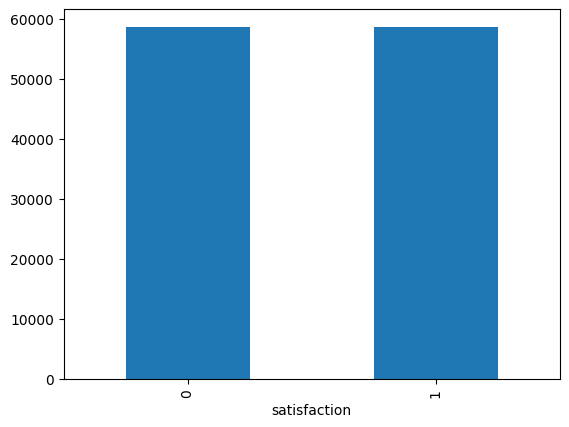

In [44]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)
y_train.value_counts().plot(kind='bar')

### <a id = "5.7"></a>5.7 - Scaling the Data
[Go back to the Table of Contents](#table_of_content)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.790941,-0.688417,0.103742,0.069766,1.349571,-0.320714,1.161245,1.194922,0.450899,-0.316381,...,1.293161,1.361933,1.243149,0.460241,-0.454795,-1.58980,1.606361,-1.019562,-0.840067,3.793931
1,-0.983657,-1.350674,0.103742,0.069766,-1.694336,-0.320714,-1.906316,-1.839646,-1.899720,1.238655,...,-1.796115,-0.034876,0.824782,-2.172776,2.198793,0.62901,-0.622525,0.980813,-0.840067,-0.263579
2,-0.916383,0.289245,-0.692508,-0.712402,1.349571,1.291425,1.161245,1.194922,0.450899,-0.316381,...,1.293161,-0.828781,-0.833410,0.460241,-0.454795,0.62901,-0.622525,0.980813,-0.840067,-0.263579
3,-0.983657,-0.481310,-0.692508,1.634102,-0.933359,-1.126784,-1.139426,-1.081004,-1.116180,1.238655,...,-1.023796,1.107160,0.996936,0.460241,-0.454795,0.62901,-0.622525,0.980813,-0.840067,-0.263579
4,1.438197,-1.439133,0.103742,0.069766,0.588595,1.291425,1.161245,-0.322362,-0.332641,0.461137,...,-0.251477,-0.828781,-0.833410,0.460241,-0.454795,0.62901,-0.622525,0.980813,-0.840067,-0.263579


In [47]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.832733,-1.708103,1.696240,0.069766,-0.172382,0.485356,-0.372536,1.194922,1.234438,1.238655,...,1.293161,1.517007,1.476942,0.460241,-0.454795,0.62901,-0.622525,-1.019562,1.190381,-0.263579
1,-0.243646,1.380181,-1.488757,0.069766,1.349571,0.485356,1.161245,0.436280,0.450899,0.461137,...,1.293161,-0.828781,-0.833410,0.460241,-0.454795,0.62901,-0.622525,0.980813,-0.840067,-0.263579
2,-1.320025,-1.540497,-0.692508,-0.712402,-0.933359,-1.126784,-1.139426,-1.081004,0.450899,-1.871417,...,-1.023796,-0.828781,-0.833410,-2.172776,2.198793,0.62901,-0.622525,-1.019562,1.190381,-0.263579
3,0.294544,1.587883,0.103742,0.069766,-0.172382,0.485356,0.394355,-1.839646,-1.899720,-1.871417,...,0.520842,-0.828781,0.824782,0.460241,-0.454795,0.62901,-0.622525,0.980813,-0.840067,-0.263579
4,0.630912,0.328187,-0.692508,0.851934,0.588595,-1.932853,-1.139426,-1.081004,-1.116180,-1.093899,...,0.520842,-0.828781,1.275338,0.460241,-0.454795,0.62901,-0.622525,-1.019562,1.190381,-0.263579


## <a id = "6"></a>6 - Building/Training/Evaluating our model
[Go back to the Table of Contents](#table_of_content)

### <a id = 6.1></a> 6.1 - Modelling various classifiers
[Go back to the Table of Contents](#table_of_content)

In [48]:
#StratifiedKFold aims to ensure each class is (approximately) equally represented across each test fold
k_fold = StratifiedKFold(n_splits=5)


airline_classifiers = []
# Creating objects of each classifier
LG_classifier = LogisticRegression(random_state=0)
airline_classifiers.append(LG_classifier)
SVC_classifier = SVC(kernel="rbf", random_state=0)
airline_classifiers.append(SVC_classifier)
KNN_classifier = KNeighborsClassifier()
airline_classifiers.append(KNN_classifier)
NB_classifier = GaussianNB()
airline_classifiers.append(NB_classifier)
DT_classifier = DecisionTreeClassifier(criterion="gini", random_state=0)
airline_classifiers.append(DT_classifier)
RF_classifier = RandomForestClassifier(n_estimators=200, criterion="gini", random_state=0)
airline_classifiers.append(RF_classifier)
AB_classifier = AdaBoostClassifier(DecisionTreeClassifier(random_state=0), random_state=0, learning_rate=0.1)
airline_classifiers.append(AB_classifier)
ET_classifier = ExtraTreesClassifier(random_state=0)
airline_classifiers.append(ET_classifier)
GB_classifier = GradientBoostingClassifier(random_state=0)
airline_classifiers.append(GB_classifier)

#This dictionary is just to grad the name of each classifier
classifier_dict = {
    0: "Logistic Regression",
    1: "Support Vector Classfication",
    2: "K Nearest Neighbor Classification",
    3: "Naive bayes Classifier",
    4: "Decision Trees Classifier",
    5: "Random Forest Classifier",
    6: "AdaBoost Classifier",
    7: "Extra Trees Classifier",
    8: "Gradient Boosting Classifier"
}

airline_results = pd.DataFrame({'Model': [],'Mean Accuracy': [], "Standard Deviation": []})

#Iterating over each classifier and getting the result
for i, classifier in enumerate(airline_classifiers):
    classifier_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=k_fold, n_jobs=4, scoring="accuracy")
    airline_results.loc[len(airline_results.index)] = [classifier_dict[i], classifier_scores.mean(), classifier_scores.std()]

In [49]:
airline_results

,Model,Mean Accuracy,Standard Deviation
0,Logistic Regression,0.882635,0.004698
1,Support Vector Classfication,0.937407,0.004702
2,K Nearest Neighbor Classification,0.923293,0.008794
3,Naive bayes Classifier,0.847462,0.003163
4,Decision Trees Classifier,0.926257,0.002126
5,Random Forest Classifier,0.950943,0.004046
6,AdaBoost Classifier,0.926351,0.002129
7,Extra Trees Classifier,0.950526,0.006608
8,Gradient Boosting Classifier,0.924357,0.003872


<b>Observations:</b>
* The top performing models after simple training are: 
    * Random Forest: 95.094% accuracy
    * Extra Trees: 95.053% accuracy

### <a id = 6.2></a>6.2 Hyperparameter tunning for best Tree-based models
[Go back to the Table of Contents](#table_of_content)

Let's perform hyperparameter tuning for the top 2 models to get the best possible models
* Random Forest Classifier
* Extra Trees Classifier

### <a id = 6.2.1></a>6.2.1 Random Forest Classifer
[Go back to the Table of Contents](#table_of_content)

In [50]:
RF_classifier = RandomForestClassifier()

# Grid search paramters for Random Forest
params = {
        "max_depth": [None],
        "max_features": [1, 3, 10],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [1, 3],
        "n_estimators" :[100, 300]
         }

RF_grid_search = GridSearchCV(RF_classifier, 
                              param_grid = params, 
                              cv=5, 
                              scoring="accuracy", 
                              n_jobs= -1, 
                              verbose = 0)

RF_grid_search.fit(X_train_scaled, y_train)

RFC_best = RF_grid_search.best_estimator_

# Best score
RF_grid_search.best_score_

0.9530811302102222

### <a id = 6.2.2></a>6.2.2 Extra Trees Classifier
[Go back to the Table of Contents](#table_of_content)

In [51]:
ET_classifier = ExtraTreesClassifier()

# Grid search paramters for Random Forest
params = {
        "max_depth": [None],
        "max_features": [1, 3, 10],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [1, 3],
        "n_estimators" :[100, 300]
         }

ET_grid_search = GridSearchCV(ET_classifier, 
                              param_grid = params, 
                              cv=5, 
                              scoring="accuracy", 
                              n_jobs= -1,
                              verbose = 0)

ET_grid_search.fit(X_train_scaled, y_train)

ETC_best = ET_grid_search.best_estimator_

# Best score
ET_grid_search.best_score_

0.9537541086326394

### <a id = 6.3></a> 6.3 - Creating Ensemble Model of Tree-Based Classifiers
[Go back to the Table of Contents](#table_of_content)

Let's create an ensemble model using the best models after Hyperparameter tuning.

In [52]:
ensemble_model = VotingClassifier(estimators=[('RFC', RFC_best), ('ETC', ETC_best)], voting='soft', n_jobs=-1)

ensemble_model = ensemble_model.fit(X_train_scaled, y_train)


### <a id = 6.4></a>6.4 - Prediction With The Best Model
[Go back to the Table of Contents](#table_of_content)

In [53]:
test_predictions = pd.Series(ensemble_model.predict(X_test_scaled).astype(int), name="satisfaction")
airline_results = pd.concat([IDtest, test_predictions, y_test], axis = 1)

In [54]:
airline_results = pd.concat([IDtest, test_predictions, y_test], axis = 1)

In [55]:
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

auc_score = roc_auc_score(y_test, test_predictions)
print("AUC Score:", auc_score)

F1_score = f1_score(y_test, test_predictions)
print("F1 Score:", F1_score)

Recall_score = recall_score(y_test, test_predictions)
print("Recall Score:", Recall_score)

Precision_score = precision_score(y_test, test_predictions)
print("Precision Score:", Precision_score)

Accuracy: 0.9506430309350017
AUC Score: 0.9479413601975691
F1 Score: 0.9427470656751187
Recall Score: 0.9258249010118785
Precision Score: 0.9602993520124121


If this notebook was of help, please give an upvote. Feel free to comment if you have any queries.